## RDS Final Project:
#### Teammates: 
- Yash Jha, Jon Dinh 
#### Data Set:
- https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset 

#### ADS:
- https://www.kaggle.com/code/tanmay111999/stroke-prediction-effect-of-data-leakage-smote/notebook 

#### ADS Citation: APA: 
- Deshpande, T. (Contributor.). (2021, January 26). Stroke Prediction Dataset. Kaggle. Retrieved March 21, 2023, from https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset 


#### Proposa (PDF)l: 
- https://drive.google.com/file/d/1dq_bGfFcTpsBfaPndiMwY4phc03uy3uA/view?usp=share_link 

#### Proposal (Google Docs): 
- https://docs.google.com/document/d/1iL53Dob0f8r27f-xEstbu4uYNZqmQQ-XLjQse6a3yQU/edit?usp=share_link

### Reading List:
● “Closing the AI accountability gap: defining an end-to-end framework for internal
algorithmic auditing”, Raji et al., ACM FAccT 2020,
https://dl.acm.org/doi/10.1145/3351095.3372873

● “Towards Algorithm Auditing: A Survey on Managing Legal, Ethical and Technological
Risks of AI, ML and Associated Algorithms”, Koshiyama et al., 2021
https://www.ssrn.com/abstract=3778998

● “Problematic Machine Behavior: A Systematic Literature Review of Algorithm Audits”,
Bandy, ACM CHI / CSCW 2021 https://dl.acm.org/doi/10.1145/3449148

● “The algorithm audit: Scoring the algorithms that score us”, Brown et al., Big Data &
Society 2021, https://journals.sagepub.com/doi/10.1177/2053951720983865

● “Resume Format, LinkedIn URLs and Other Unexpected Influences of AI Personality
Prediction in Hiring: Results of an Audit”, Rhea et al., AIES 2022
https://dl.acm.org/doi/10.1145/3514094.3534189

● “Nutritional labels for data and models”, Stoyanovich and Howe, IEEE Data Engineering
Bulletin Special Issue on Fairness, Diversity, and Transparency in Data Systems 42(3),
2019, http://sites.computer.org/debull/A19sept/p13.pdf

● “The imperative of interpretable machines”, Stoyanovich, Van Bavel, West, Nature
Machine Intelligence 2, 2020, https://rdcu.be/b57mr

● “The dataset nutrition label: A Framework to drive higher data quality standards”, Holland et al., arXiv 2018, https://arxiv.org/abs/1805.03677

● “Datasheets for datasets”, Gebru et al., Communications of the ACM, 2021
https://cacm.acm.org/magazines/2021/12/256932-datasheets-for-datasets/fulltext

● “Model cards for model reporting”, Mitchell et al., ACM FAT* 2019
https://dl.acm.org/doi/10.1145/3287560.3287596

\\Fairness-Full-Tree-1200x908.png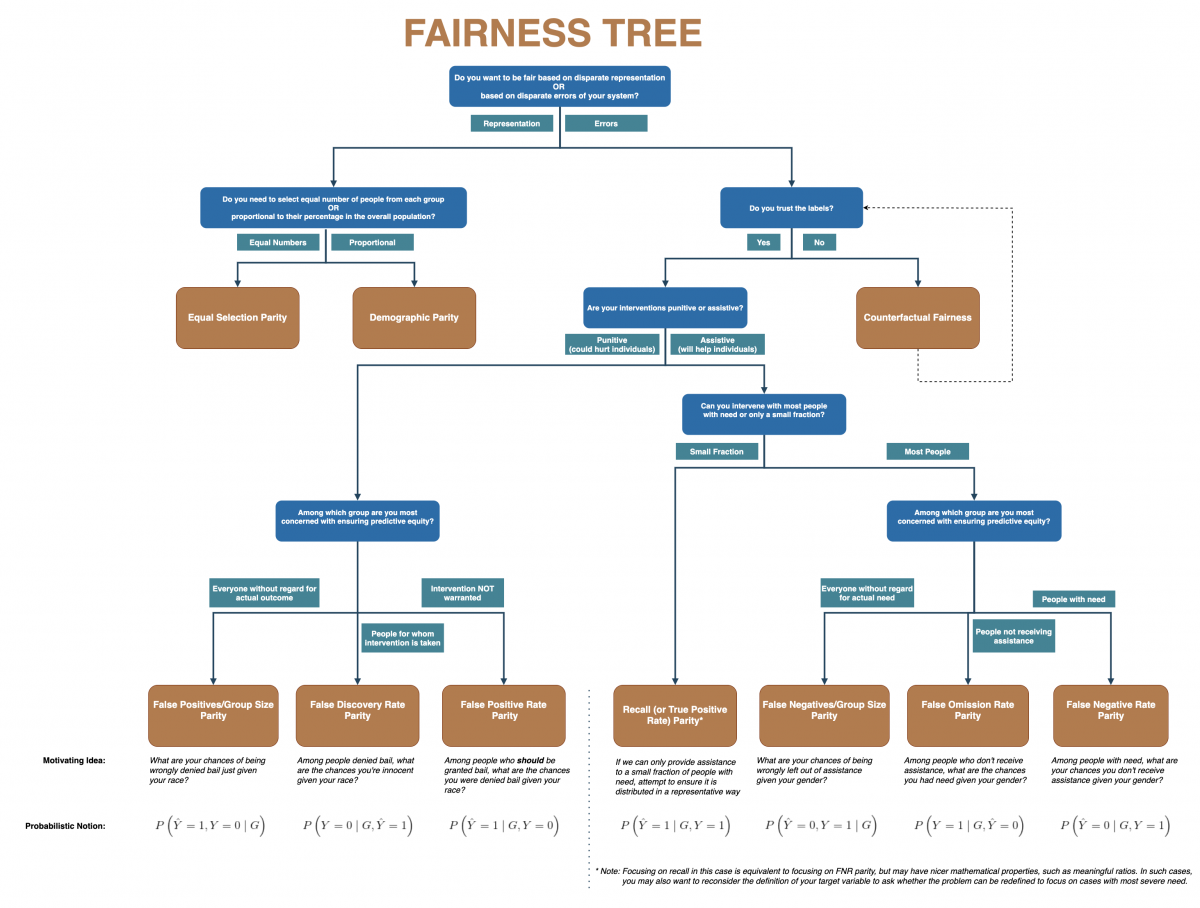

In [ ]:
!pip freeze

absl-py==1.4.0
alabaster==0.7.13
albumentations==1.2.1
altair==4.2.2
anyio==3.6.2
appdirs==1.4.4
argon2-cffi==21.3.0
argon2-cffi-bindings==21.2.0
array-record==0.2.0
arviz==0.15.1
astropy==5.2.2
astunparse==1.6.3
attrs==23.1.0
audioread==3.0.0
autograd==1.5
Babel==2.12.1
backcall==0.2.0
beautifulsoup4==4.11.2
bleach==6.0.0
blis==0.7.9
blosc2==2.0.0
bokeh==2.4.3
branca==0.6.0
build==0.10.0
CacheControl==0.12.11
cached-property==1.5.2
cachetools==5.3.0
catalogue==2.0.8
certifi==2022.12.7
cffi==1.15.1
chardet==4.0.0
charset-normalizer==2.0.12
chex==0.1.7
click==8.1.3
cloudpickle==2.2.1
cmake==3.25.2
cmdstanpy==1.1.0
colorcet==3.0.1
colorlover==0.3.0
community==1.0.0b1
confection==0.0.4
cons==0.4.5
contextlib2==0.6.0.post1
contourpy==1.0.7
convertdate==2.4.0
cryptography==40.0.2
cufflinks==0.17.3
cvxopt==1.3.0
cvxpy==1.3.1
cycler==0.11.0
cymem==2.0.7
Cython==0.29.34
dask==2022.12.1
datascience==0.17.6
db-dtypes==1.1.1
dbus-python==1.2.16
debugpy==1.6.6
decorator==4.4.2
defusedxml==0.7.1
di

# Settings and Imports 

In [ ]:
!pip install aequitas
!pip install fairlearn
#!pip install sklearn
!pip install -U imbalanced-learn
#!pip install scikit-learn==0.22.1
#!pip install -U scikit-image
!pip install shap
!pip install lime

# paths
DATAPATH = 'healthcare-dataset-stroke-data.csv'

# import data management
import numpy as np
import pandas as pd
from google.colab import files

# import visualization
import matplotlib.pyplot as plt 
import seaborn as sns
import missingno as msno

# import data processing
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, mutual_info_classif,chi2, f_classif
import shap

# import models
from xgboost import XGBClassifier

# import fairness interventions
from fairlearn.preprocessing import CorrelationRemover
from fairlearn.postprocessing import ThresholdOptimizer

# import performance metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import RocCurveDisplay, precision_recall_curve, roc_auc_score, roc_curve, auc
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score, GridSearchCV
import lime
import lime.lime_tabular
# import fairness metrics
#from aequitas.group import Group
#from aequitas.bias import Bias
#from aequitas.fairness import Fairness
#from aequitas.plotting import Plot
from fairlearn.reductions import DemographicParity, ErrorRate
from fairlearn.metrics import MetricFrame, equalized_odds_ratio
from fairlearn.metrics import demographic_parity_difference, demographic_parity_ratio, selection_rate 
from fairlearn.metrics import false_negative_rate, false_positive_rate

# import basic functions
from IPython.display import display, clear_output
import warnings
warnings.filterwarnings('ignore')

# balanced distributions
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek, SMOTEENN
from imblearn.pipeline import Pipeline

# setting
pd.set_option('display.max_columns', None)

clear_output()

# EDA and Data Profiling

In [ ]:
# NOTE: either upload csv into current files in the left pane or mount google drive
# loading the original dataset
data = pd.read_csv(DATAPATH)

# view the shape
print('Shape of original data: ', data.shape)
data.head()

Shape of original data:  (5110, 12)


id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1

In [ ]:
# what are the column names and dtypes?
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
# stats of numerical data
numerical_cols = list(data.describe(exclude = 'object').drop(['id','stroke'], axis=1).columns)
data.describe(exclude = 'object')

id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  4909.000000  5110.000000  
mean          106.147677    28.893237     0.048728  
std            45.283560     7.854067     0.215320  
min            55.120000    10.300000     0.000000  
25%            77.245000    23.500000     0.000000  
50%            91.885000    28.100000     0.000000  
75%           114.090000    33.100000     0.000000  
max           271.740000    97.600000     1.000000

Text(0.5, 1.0, 'bmi distribution')

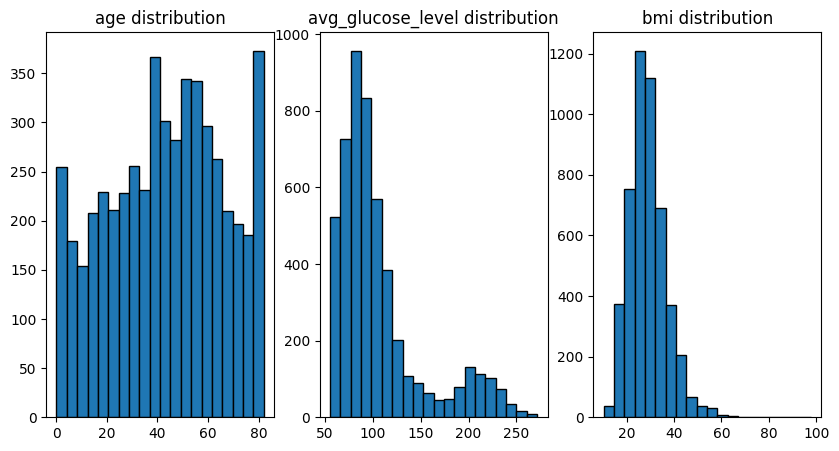

In [ ]:
# there are 3 numerical feature columns that are not indicators -> see the distribution of each
# seems like we need to normalize and standardize all of these
fig, ax = plt.subplots(1, 3, figsize = (10, 5))
ax[0].hist(data['age'], bins = 20, ec = 'black');
ax[0].set_title('age distribution')
ax[1].hist(data['avg_glucose_level'], ec = 'black', bins = 20);
ax[1].set_title('avg_glucose_level distribution')
ax[2].hist(data['bmi'], ec = 'black', bins = 20);
ax[2].set_title('bmi distribution')

In [ ]:
# stats of categorical data
categorical_cols = list(data.describe(exclude = ['float64', 'int64']).columns)
data.describe(exclude = ['float64', 'int64'])

gender ever_married work_type Residence_type smoking_status
count     5110         5110      5110           5110           5110
unique       3            2         5              2              4
top     Female          Yes   Private          Urban   never smoked
freq      2994         3353      2925           2596           1892

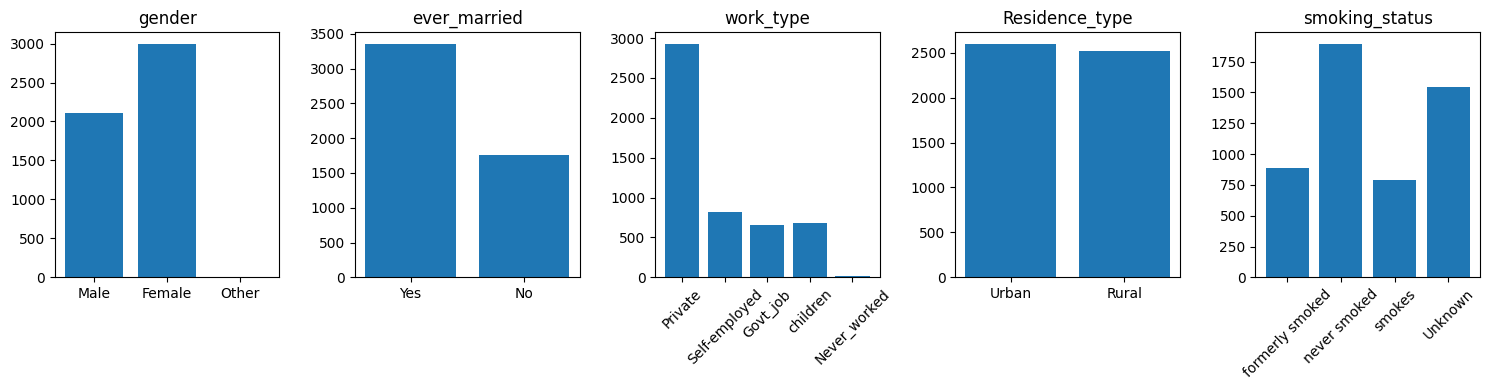

In [ ]:
# distributions of categorical data
fig, ax = plt.subplots(1, 5, figsize = (15, 4))
ax[0].bar(data['gender'].unique(), data['gender'].value_counts(sort=False));
ax[0].set_title('gender')
ax[1].bar(data['ever_married'].unique(), data['ever_married'].value_counts(sort=False));
ax[1].set_title('ever_married')
ax[2].bar(data['work_type'].unique(), data['work_type'].value_counts(sort=False));
ax[2].set_title('work_type')
ax[2].set_xticklabels(data['work_type'].unique(), rotation = 45)
ax[3].bar(data['Residence_type'].unique(), data['Residence_type'].value_counts(sort=False));
ax[3].set_title('Residence_type')
ax[4].bar(data['smoking_status'].unique(), data['smoking_status'].value_counts(sort=False));
ax[4].set_title('smoking_status')
ax[4].set_xticklabels(data['smoking_status'].unique(), rotation = 45)
plt.tight_layout()
plt.show()

<Axes: >

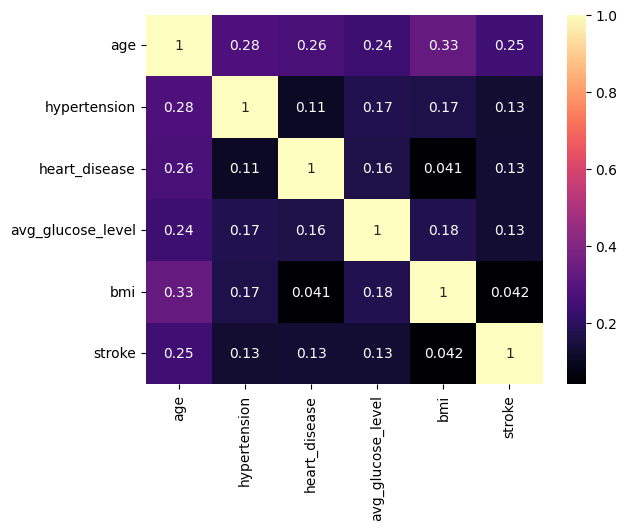

In [ ]:
# what is the correlation between features in the data
sns.heatmap(data.drop(['id'], axis = 1).corr(), cmap = 'magma', annot = True)

Number of NULL entries:  201
Percentage of NULL entries: 0.328%


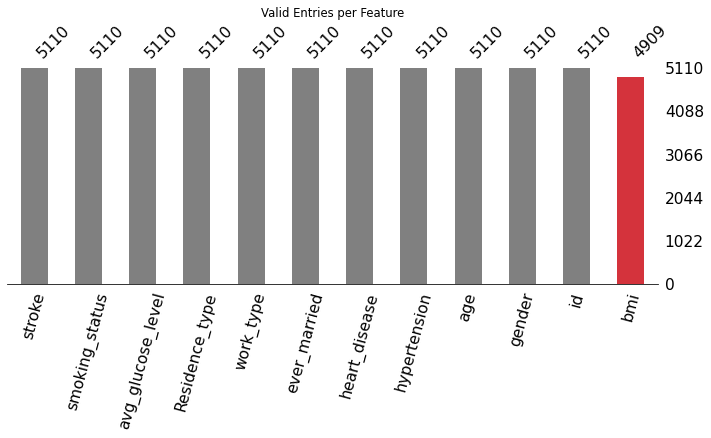

In [ ]:
# look into the null values
print('Number of NULL entries: ', data.isnull().sum().sum())
print('Percentage of NULL entries: {}%'.format(round(data.isnull().sum().sum()/(data.shape[0]*data.shape[1])*100, 3)))


# we see that all the NULL values reside in the BMI feature
colors = list(['grey']*11) + ['#D4333C']
fig, ax = plt.subplots(figsize = (12, 4), dpi = 70)
msno.bar(data, sort = 'descending', ax=ax, labels = 'off', filter = 'top', color = colors)
ax.set_title('Valid Entries per Feature')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 75, ha = 'center', alpha = 1)
ax.set_yticklabels('')
ax.spines['bottom'].set_visible(True)
fig.show()

Text(0.5, 1.0, 'Stroke Events (%)')

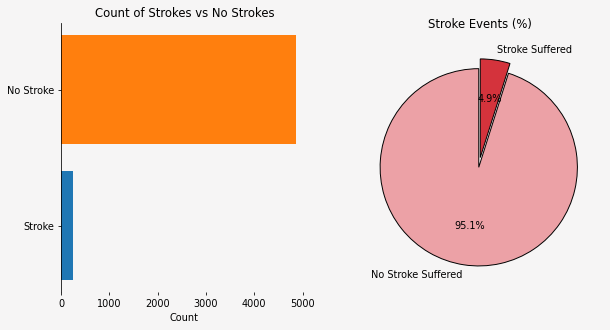

In [ ]:
# horizontal bar plot of positive vs negative observations -> distribution
grouped = pd.DataFrame(data.groupby(['stroke'])['stroke'].count())
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10,5), dpi =70)
fig.patch.set_facecolor('#f6f5f5')
ax[0].set_facecolor('#f6f5f5')
ax[0].barh('Stroke', grouped.stroke[1])
ax[0].barh('No Stroke', grouped.stroke[0])
ax[0].set_title('Count of Strokes vs No Strokes')
ax[0].set_xlabel('Count')
ax[0].axes.get_yaxis().set_visible(True)
ax[0].axes.get_xaxis().set_visible(True)
ax[0].spines['bottom'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)

colors = ['#ECA1A6','#D4333C']
l = list(data['stroke'].value_counts())
circle = [l[0] / sum(l) * 100,l[1] / sum(l) * 100]
ax[1].pie(circle,
        labels = ['No Stroke Suffered','Stroke Suffered'],
        autopct='%1.1f%%',
        startangle = 90,
        explode = (0.1,0),
        colors = colors,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
ax[1].set_title('Stroke Events (%)')

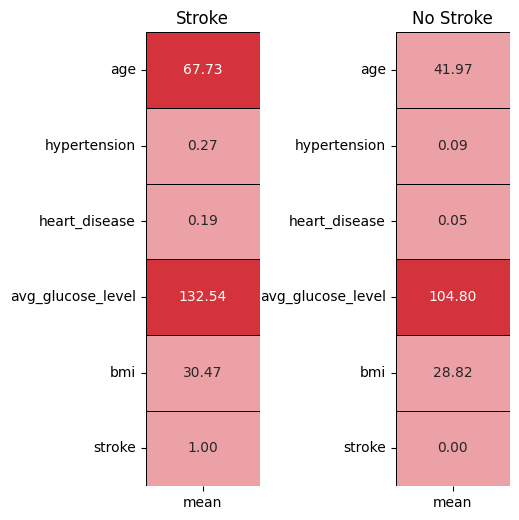

In [ ]:
# univariate analysis of integer/continous features using average means
stroke = data[data['stroke'] == 1].drop(['id'], axis = 1).describe().T
no_stroke = data[data['stroke'] == 0].drop(['id'], axis = 1).describe().T

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,5))
plt.subplot(1,2,1)
sns.heatmap(stroke[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('Stroke');

plt.subplot(1,2,2)
sns.heatmap(no_stroke[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('No Stroke');

fig.tight_layout(pad = 0)

# Helper Functions for Model Evaluation and Metric Storage

In [ ]:
def clean(DATAPATH):
      # data read in + vars
      data = pd.read_csv(DATAPATH)
      # data cleaning
      df = data.drop(['id'], axis = 1)
      df.bmi.fillna(data.bmi.mean(), inplace = True)
      df = df[df['gender'] != 'Other']
      return df

In [ ]:
def encode(data, categorical_cols):
      df = data.copy(deep = True)
      encoder = LabelEncoder()
      # preprocessing
      for i in categorical_cols:
          df[i] = encoder.fit_transform(df[i])
          print(encoder.classes_)
      return df

In [ ]:
def drop_feature(x_train, x_test): 
    # feature selection drop
    x_train = x_train.drop(['smoking_status', 'heart_disease', 'hypertension', 'bmi'], axis = 1)
    x_test = x_test.drop(['smoking_status', 'heart_disease', 'hypertension', 'bmi'], axis = 1)
    return x_train, x_test

In [ ]:
def tts(df):
      X = df[[x for x in df.columns if x not in ['id', 'stroke']]]
      Y = df['stroke']
      # splitting
      x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.15, random_state = 1, stratify = Y)
      return x_train, x_test, y_train, y_test

In [ ]:
# NOTE: after this step, consider the data to be synthetic, therefore do not give high weight to accuracy
# NOTE: (continued) instead, focus on confusion matrix for evaluation  

def under_smote(x_train, y_train):
    """
    Hybrid resampling method used in original ADS. 
    Undersamples the majority class by 0.1. 
    Generates synthetic minority classes to 1:1 ratio of previous undersampled majority class.
    Example: 1000 major, 10 minor -> original distribution
             100  major, 10 minor -> under sample by 0.1 of majority
             100  major, 100 minor -> up sample to match majority
    """
    under = RandomUnderSampler(sampling_strategy = 0.1, random_state = 1)
    over = SMOTE(sampling_strategy = 1, random_state = 1)
    x_train, y_train = under.fit_resample(x_train, y_train) 
    x_train, y_train = over.fit_resample(x_train, y_train) 
    print(Counter(y_train)) # class distribution should now be relatively even in the training set
    return x_train, y_train

def adasyn(x_train, y_train):
    """
    Generalized SMOTE algorithm. Attempts to oversample the minorty class, considering 
    density distribution. Adaptively changes the decision boundaries. 
    """
    ada = ADASYN(random_state =1)
    x_train, y_train = ada.fit_resample(x_train, y_train)
    print(Counter(y_train))
    return x_train, y_train

def smote_tomek(x_train, y_train):
    """
    Hybrid undersampling and oversampling: clean overlapping datapoints for each class. 
    """
    smtom = SMOTETomek(random_state = 1)
    x_train, y_train = smtom.fit_resample(x_train, y_train)
    print(Counter(y_train))
    return x_train, y_train

def smote_enn(x_train, y_train):
    smoenn = SMOTEENN()
    x_train, y_train = smoenn.fit_resample(x_train, y_train)
    print(Counter(y_train))
    return x_train, y_train

In [ ]:
def scaling(x_train, x_test):
    # ADS normalizes those without normal distribution
    # ADS standardizes those that have normal distribution, but large ranges

    # scalers
    mms = MinMaxScaler() 
    ss = StandardScaler() 

    # Normalization
    x_train['age'] = mms.fit_transform(x_train[['age']])
    x_test['age'] = mms.transform(x_test[['age']])
    x_train['avg_glucose_level'] = mms.fit_transform(x_train[['avg_glucose_level']])
    x_test['avg_glucose_level'] = mms.transform(x_test[['avg_glucose_level']])

    # Standardization
    x_train['ever_married'] = ss.fit_transform(x_train[['ever_married']]); x_test['ever_married'] = ss.transform(x_test[['ever_married']])
    x_train['work_type'] = ss.fit_transform(x_train[['work_type']]); x_test['work_type'] = ss.transform(x_test[['work_type']])
    x_train['Residence_type'] = ss.fit_transform(x_train[['Residence_type']]); x_test['Residence_type'] = ss.transform(x_test[['Residence_type']])
    return x_train, x_test

In [ ]:
def corr_remover(x_train, x_test, sensitive_feature):
    """
    Correlation remover:  
      NOTE: Do this after any feature extraction or feature selection
      input: x_train, x_test
    """
    # grab column names
    column_names = list(x_train.columns.values)
    column_names.remove(sensitive_feature)

    cr = CorrelationRemover(sensitive_feature_ids=[sensitive_feature], alpha=1.0)

    # Fit our correlation removing model on *only* training data
    cr.fit(x_train)

    # Remove correlations on both training and test data

    x_train_cr = cr.transform(x_train) # returns a numpy array, not a dataframe
    x_train_cr = pd.DataFrame(x_train_cr, columns=column_names, index=x_train.index)
    x_train_cr[sensitive_feature] = x_train[sensitive_feature]

    x_test_cr = cr.transform(x_test)
    x_test_cr = pd.DataFrame(x_test_cr, columns=column_names, index=x_test.index)
    x_test_cr[sensitive_feature] = x_test[sensitive_feature]
    return x_train, x_test

In [ ]:

def eval(pipe, x_train, y_train, x_test, y_test, show_roc = True, show_cm = True, sensitive_feature = None):
    # fit and predict pipeline
    if sensitive_feature:
      pipe.fit(x_train, y_train, sensitive_features = x_train[sensitive_feature].replace({0:'female', 1:'male'}))
      prediction = pipe.predict(x_test, sensitive_features = x_test[sensitive_feature].replace({0:'female', 1:'male'}))
    else:
      pipe.fit(x_train, y_train)
      prediction = pipe.predict(x_test)
    # obtain performance metrics
    cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
    precision, recall, fscore, _ = precision_recall_fscore_support(y_test, prediction, average = 'weighted')
    cm = confusion_matrix(y_test,prediction)
    fpr, tpr, thresholds = roc_curve(y_test, prediction)
    roc_acc = roc_auc_score(y_test, prediction)
    # obtain fairness metrics
    sensitive_features_gender = x_test['gender'].replace({0:'female', 1:'male'})
    metrics = {'accuracy': accuracy_score, 'selection_rate': selection_rate, 'FNR': false_negative_rate, 'FPR': false_positive_rate}
    grouped_on_gender = MetricFrame(metrics = metrics, y_true = y_test, y_pred = prediction, sensitive_features = sensitive_features_gender)
    # plot roc_auc and cvs
    if show_roc:
        print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(pipe,x_train,y_train,cv = cv,scoring = 'roc_auc').mean()))
        print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test,prediction)))
        display = RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc = roc_acc, estimator_name = 'XGBoost')
        display.plot()
        plt.show()
    # plot the confusion matrix
    if show_cm:      
        names = ['True Neg','False Pos','False Neg','True Pos']
        counts = [value for value in cm.flatten()]
        colors = ['#ECA1A6','#D4333C']
        percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
        labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
        labels = np.asarray(labels).reshape(2,2)
        plt.subplots(figsize = (3,3));
        sns.heatmap(cm,annot = labels,cmap = colors,fmt ='')
    # create res object to return 
    results={'acc': accuracy_score(y_test, prediction), #(cm[1][1] + cm[0][0]) / (cm[0][0] + cm[0][1] + cm[1][0]+ cm[1][1]) ,
             'ppv':precision,                           #cm[1][1] / (cm[1][1]+cm[0][1]),
             'npv':cm[0][0] / (cm[0][0]+cm[1][0]),
             'recall':recall,                           #cm[1][1] / (cm[1][1] + cm[1][0]),
             'f1':fscore,
             'TN': cm[0][0],
             'FP': cm[0][1],
             'FN': cm[1][0],
             'TP': cm[1][1],
             'roc_acc':roc_acc,
             'FPR': cm[0][1] / (cm[0][1] + cm[0][0]),
             'TPR': cm[1][1] / (cm[1][1] + cm[1][0]),
             'TNR': cm[0][0] / (cm[0][0] + cm[0][1]),
             'FNR': cm[1][0] / (cm[1][0] + cm[1][1]),
             'FNRP':grouped_on_gender.ratio()[2],
             'equalized_odds_ratio':equalized_odds_ratio(y_test, prediction, sensitive_features = x_test['gender']),
             'demo_parity_diff': demographic_parity_difference(y_test, prediction, sensitive_features = x_test['gender']),
             'demo_parity_ratio': demographic_parity_ratio(y_test, prediction, sensitive_features = x_test['gender']),
             'female_acc': grouped_on_gender.by_group.iloc[0, 0],
             'female_sr': grouped_on_gender.by_group.iloc[0,1],
             'female_FNR': grouped_on_gender.by_group.iloc[0,2],
             'female_FPR': grouped_on_gender.by_group.iloc[0,3],
             'male_acc': grouped_on_gender.by_group.iloc[1, 0],
             'male_sr': grouped_on_gender.by_group.iloc[1,1],
             'male_FNR': grouped_on_gender.by_group.iloc[1,2],
             'male_FPR': grouped_on_gender.by_group.iloc[1,3]}
    
    return results, grouped_on_gender, prediction

In [ ]:
def check_cm(y_test, prediction):
  TP = 0
  FP = 0
  TN = 0
  FN = 0
  for a, b in zip(y_test, prediction1):
    if a == 1 and b == 1:
      TP += 1
    elif a == 0 and b == 1:
      FP += 1
    elif a == 0 and b == 0:
      TN += 1
    else:
      FN += 1
  print('TP: ', TP)
  print('FP: ', FP)
  print('TN: ', TN)
  print('FN: ', FN)

In [ ]:
def store_res(exp_result,exp_name,overall_result=pd.DataFrame()):
    for i in exp_result.keys():
        exp_result[i] = np.round(exp_result[i], 3)
    df=pd.DataFrame(exp_result,index=[exp_name])
    return pd.concat([overall_result,df],axis=0)

# Run Original ADS Pipeline:

## Cleaning and Preprocessing

['Female' 'Male']
['No' 'Yes']
['Govt_job' 'Never_worked' 'Private' 'Self-employed' 'children']
['Rural' 'Urban']
['Unknown' 'formerly smoked' 'never smoked' 'smokes']
Counter({0: 2490, 1: 2490})


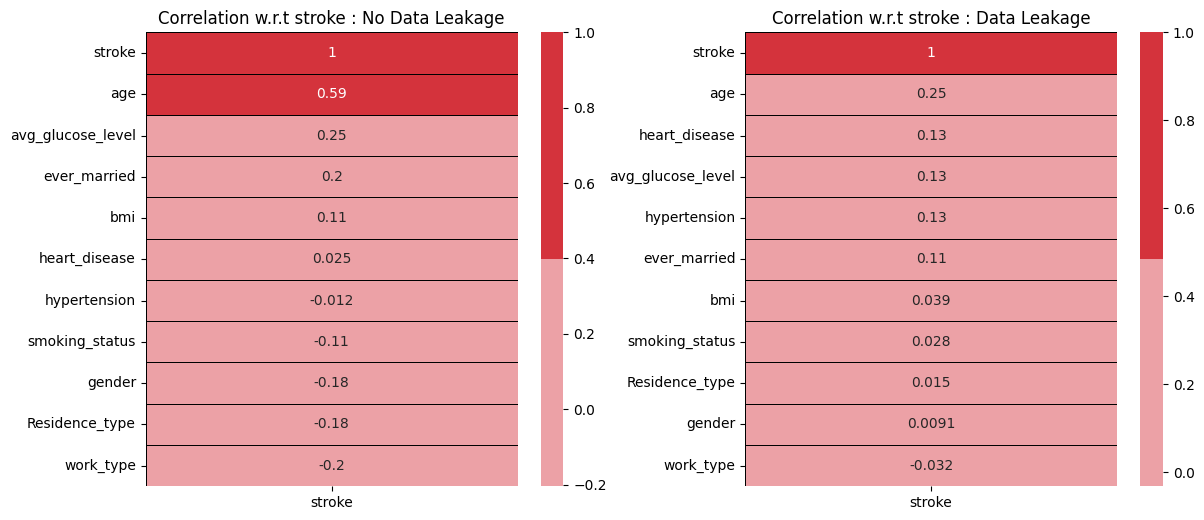

In [ ]:
# cleaning
df = clean(DATAPATH)

# encode
df = encode(df, categorical_cols)
   
# Unbalanced distribution with bias for "no stroke" 
# NOTE: original system did resampling before splitting, allowing data leakage
under = RandomUnderSampler(sampling_strategy = 0.1, random_state = 1)
over = SMOTE(sampling_strategy = 1, random_state = 1)
X = df.iloc[:, :10] 
Y = df.iloc[:, 10] 
X, Y = under.fit_resample(X, Y) 
X, Y = over.fit_resample(X, Y) 
print(Counter(Y)) 

# splitting data into train and validation sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.15, random_state = 1, stratify = Y)

# visualize the data leakage vs no data leakage
df_noleak = x_train.copy(deep = True)
df_noleak['stroke'] = y_train
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12,5))
plt.subplot(1,2,1)
corr = df_noleak.corrwith(df_noleak['stroke']).sort_values(ascending = False).to_frame()
corr.columns = ['stroke']
sns.heatmap(corr,annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black');
plt.title('Correlation w.r.t stroke : No Data Leakage');

plt.subplot(1,2,2)
corr = df.corrwith(df['stroke']).sort_values(ascending = False).to_frame()
corr.columns = ['stroke']
sns.heatmap(corr,annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black');
plt.title('Correlation w.r.t stroke : Data Leakage');
fig.tight_layout(pad = 0)
plt.show()

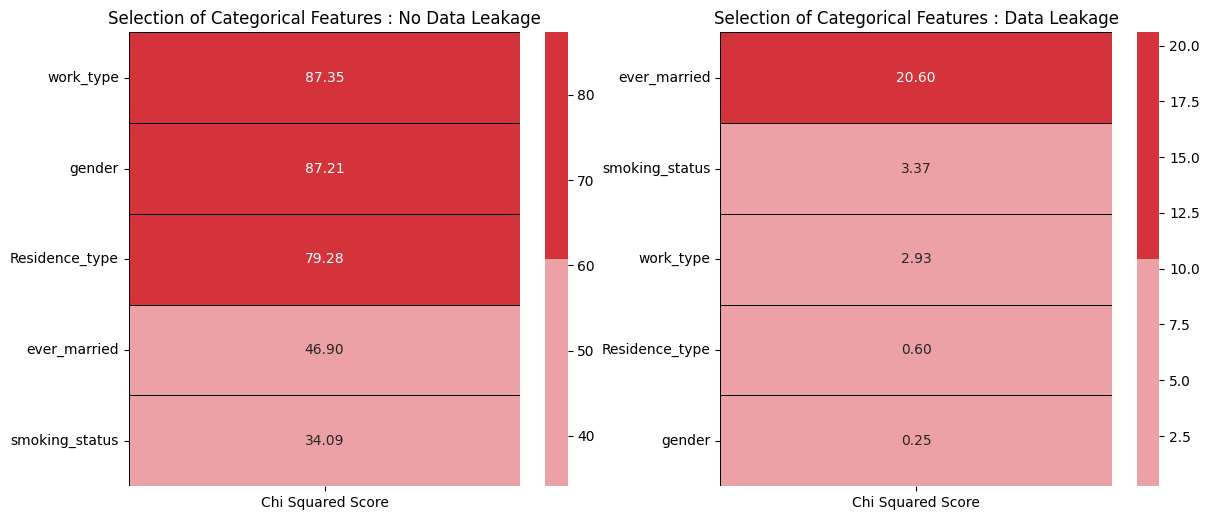

In [ ]:
# feature selection for categorical features
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12,5))

plt.subplot(1,2,1)
features = x_train.loc[:,categorical_cols]
target = y_train

best_features = SelectKBest(score_func = chi2,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['Chi Squared Score']) 
sns.heatmap(featureScores.sort_values(ascending = False,by = 'Chi Squared Score'),annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Categorical Features : No Data Leakage');

plt.subplot(1,2,2)
features = df.loc[:,categorical_cols]
target = df.loc[:,'stroke']

best_features = SelectKBest(score_func = chi2,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['Chi Squared Score']) 
sns.heatmap(featureScores.sort_values(ascending = False,by = 'Chi Squared Score'),annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Categorical Features : Data Leakage')
fig.tight_layout(pad = 0)
plt.show()

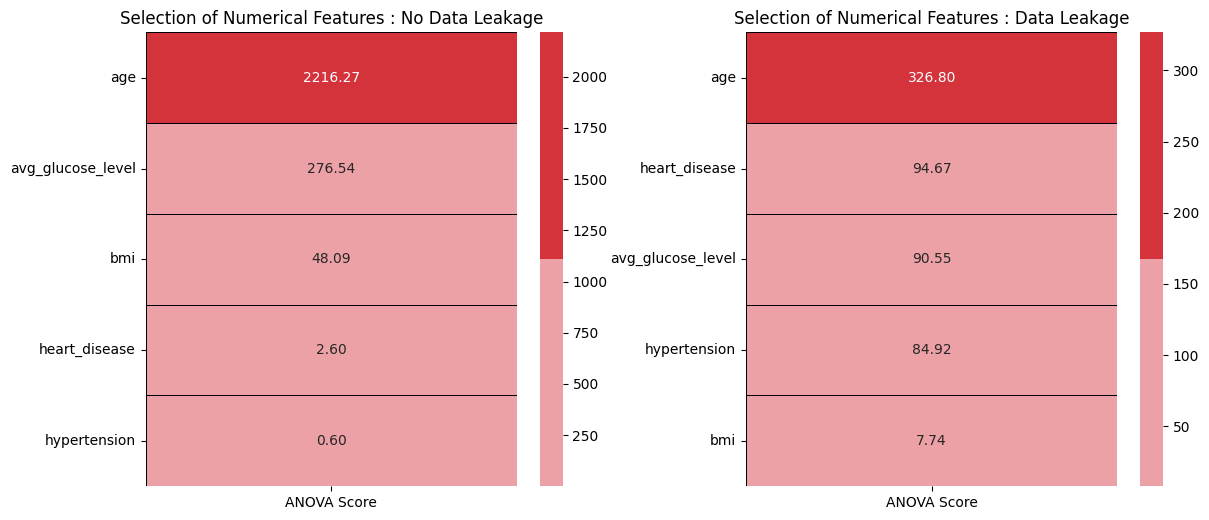

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12,5))

plt.subplot(1,2,1)
features = x_train.loc[:,numerical_cols]
target = y_train

best_features = SelectKBest(score_func = f_classif,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['ANOVA Score']) 
sns.heatmap(featureScores.sort_values(ascending = False,by = 'ANOVA Score'),annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Numerical Features : No Data Leakage');

plt.subplot(1,2,2)
features = df.loc[:,numerical_cols]
target = df.loc[:, 'stroke']

best_features = SelectKBest(score_func = f_classif,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['ANOVA Score']) 
sns.heatmap(featureScores.sort_values(ascending = False,by = 'ANOVA Score'),annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Numerical Features : Data Leakage')

fig.tight_layout(pad = 0)
plt.show()

In [ ]:
x_train, x_test = drop_feature(x_train, x_test)
x_train, x_test = scaling(x_train, x_test)

## Run and Metrics of Original ADS:

Cross Validation Score :  91.82%
ROC_AUC Score :  83.93%


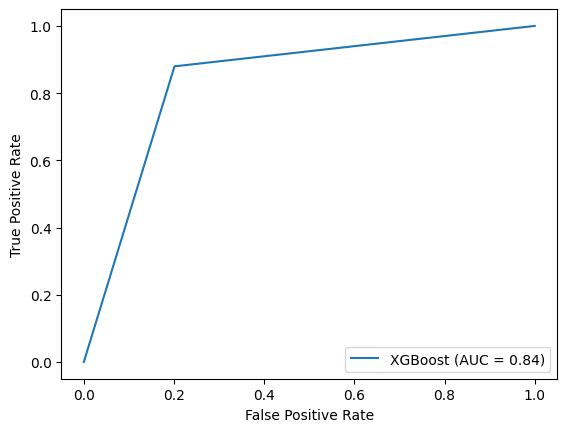

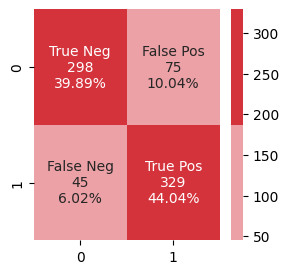

In [ ]:
# run the ADS and view performance metrics
classifier1 = XGBClassifier(learning_rate= 0.01,max_depth = 3,n_estimators = 1000)
performance1, fairness1, prediction1 = eval(classifier1, x_train,y_train, x_test, y_test)
df_res = store_res(performance1, 'Original ADS')

In [ ]:
df_res

acc    ppv    npv  recall     f1   TN  FP  FN   TP  roc_acc  \
Original ADS  0.839  0.842  0.869   0.839  0.839  298  75  45  329    0.839   

                FPR   TPR    TNR   FNR   FNRP  equalized_odds_ratio  \
Original ADS  0.201  0.88  0.799  0.12  0.569                 0.493   

              demo_parity_diff  demo_parity_ratio  female_acc  female_sr  \
Original ADS             0.218              0.644       0.832      0.613   

              female_FNR  female_FPR  male_acc  male_sr  male_FNR  male_FPR  
Original ADS       0.101       0.253     0.855    0.395     0.177     0.125

In [ ]:
fairness1.by_group

accuracy  selection_rate       FNR       FPR
gender                                              
female  0.831663        0.613226  0.100719  0.253394
male    0.854839        0.395161  0.177083  0.125000

## Plots of Original ADS

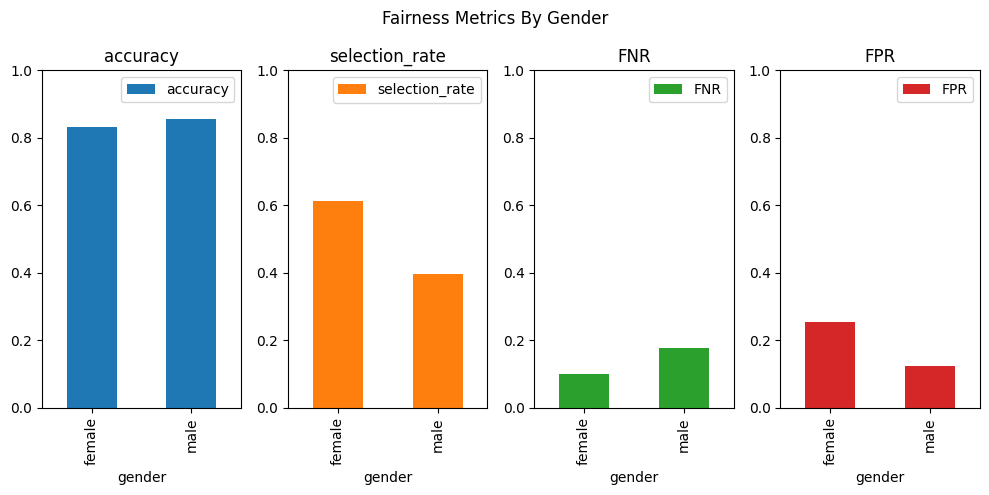

In [ ]:
# visualize fairness metrics of original ADS by gender
# subplots, layout, legend, figsize, title
fairness1.by_group.plot.bar(subplots = True, layout = [1, 4] ,figsize = (10,5), ylim = [0,1], title = 'Fairness Metrics By Gender')
plt.tight_layout()

In [ ]:
fairness1.ratio()

accuracy          0.972889
selection_rate    0.644397
FNR               0.568769
FPR               0.493304
dtype: float64

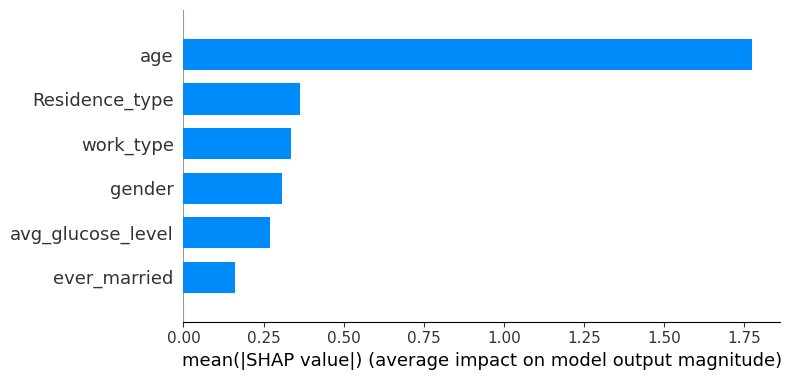

In [ ]:
# feature importance from SHAP values
explainer = shap.TreeExplainer(classifier1)
shap_values = explainer.shap_values(x_test)
shap.summary_plot(shap_values, x_test, plot_type="bar")

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

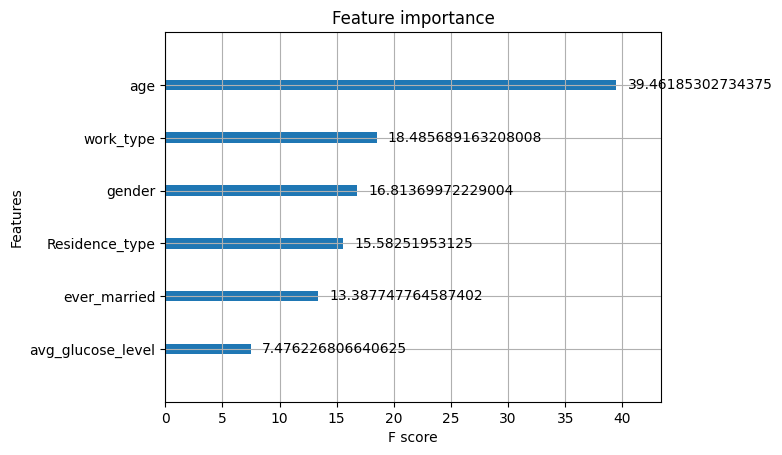

In [ ]:
# feature importance from built in model using gain = number of times that feature was split in tree model
from xgboost import plot_importance
plot_importance(classifier1.get_booster(), importance_type = 'gain')

In [ ]:
explainer = lime.lime_tabular.LimeTabularExplainer(x_train.values, 
                                                   feature_names=x_train.columns,
                                                   class_names=['no stroke','stroke'],
                                                   verbose=True)
predict_fn = lambda x: classifier1.predict_proba(x).astype(float)

Predicted class:  0
Actual class:  0
Intercept 0.7211943663844402
Prediction_local [-0.16917977]
Right: 0.04213455319404602


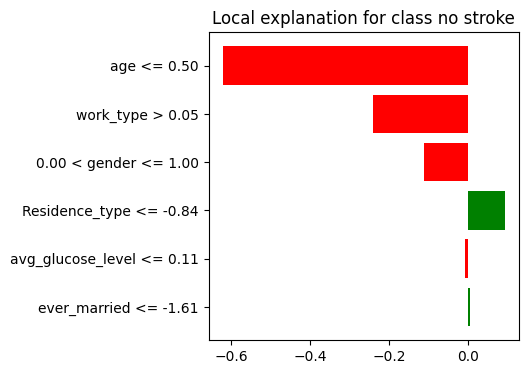

In [ ]:
i = 0
print('Predicted class: ', prediction1[i])
print('Actual class: ', y_test.values[i])
# Get explanation
exp = explainer.explain_instance((x_test.values[i]), predict_fn, num_features=6)
exp.as_list()

# Visualize the explanation 
%matplotlib inline
fig = plt.figure(figsize=(4, 4))
vals = [x[1] for x in exp.as_list(label=1)]
names = [x[0] for x in exp.as_list(label=1)]
vals.reverse()
names.reverse()
colors = ['green' if x > 0 else 'red' for x in vals]
pos = np.arange(len(exp.as_list(label=1))) + .5
plt.barh(pos, vals, align='center', color=colors)
plt.yticks(pos, names)
if exp.mode == "classification":
    title = 'Local explanation for class %s' % exp.class_names[0]
else:
    title = 'Local explanation'
plt.title(title)
exp.show_in_notebook(show_all=True)

Predicted class:  1
Actual class:  1
Intercept 0.18104313150131984
Prediction_local [0.87204142]
Right: 0.7806265354156494


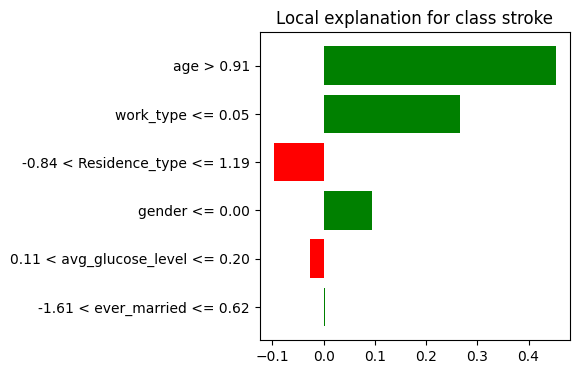

In [ ]:
i =8
print('Predicted class: ', prediction1[i])
print('Actual class: ', y_test.values[i])
# Get explanation
exp = explainer.explain_instance((x_test.values[i]), predict_fn, num_features=6)
exp.as_list()

# Visualize the explanation 
%matplotlib inline
fig = plt.figure(figsize=(4, 4))
vals = [x[1] for x in exp.as_list(label=1)]
names = [x[0] for x in exp.as_list(label=1)]
vals.reverse()
names.reverse()
colors = ['green' if x > 0 else 'red' for x in vals]
pos = np.arange(len(exp.as_list(label=1))) + .5
plt.barh(pos, vals, align='center', color=colors)
plt.yticks(pos, names)
if exp.mode == "classification":
    title = 'Local explanation for class %s' % exp.class_names[1]
else:
    title = 'Local explanation'
plt.title(title)
exp.show_in_notebook(show_all=True)

# Modification 1: Data Cleaning and / or Preprocessing
- SMOTE ratios or techniques (original, adasync, smotetomek, smoteenn)
- correlation remover

['Female' 'Male']
['No' 'Yes']
['Govt_job' 'Never_worked' 'Private' 'Self-employed' 'children']
['Rural' 'Urban']
['Unknown' 'formerly smoked' 'never smoked' 'smokes']
Counter({0: 4130, 1: 4072})
0 adasyn ADS
['Female' 'Male']
['No' 'Yes']
['Govt_job' 'Never_worked' 'Private' 'Self-employed' 'children']
['Rural' 'Urban']
['Unknown' 'formerly smoked' 'never smoked' 'smokes']
Counter({0: 4081, 1: 4081})
1 smote_tomek ADS
['Female' 'Male']
['No' 'Yes']
['Govt_job' 'Never_worked' 'Private' 'Self-employed' 'children']
['Rural' 'Urban']
['Unknown' 'formerly smoked' 'never smoked' 'smokes']
Counter({1: 3877, 0: 3093})
2 smote_enn ADS


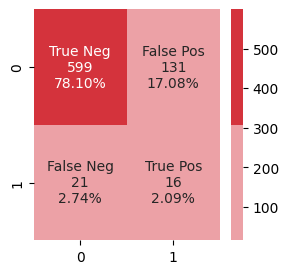

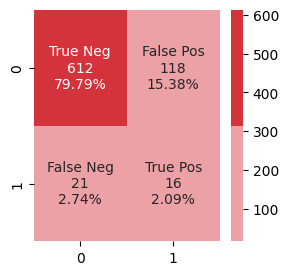

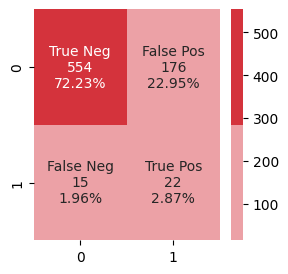

In [ ]:
func = [adasyn, smote_tomek, smote_enn]
for i in range(len(func)):
    # read and clean
    df = clean(DATAPATH)
    # encode categorical
    df = encode(df, categorical_cols)
    # split 
    x_train, x_test, y_train, y_test = tts(df)
    # changing sampling techniques
    x_train, y_train = func[i](x_train, y_train)
    # feature selection
    x_train, x_test = drop_feature(x_train, x_test)
    # scaling
    x_train, x_test = scaling(x_train, x_test)
    # run the modified ADS -> only normalization
    classifier2 = XGBClassifier(learning_rate= 0.01,max_depth = 3,n_estimators = 1000)
    performance2, fairness2, prediction2 = eval(classifier2, x_train, y_train, x_test, y_test, show_roc = False)
    name = ''
    if i == 0: 
        name = 'adasyn ADS'
    elif i == 1:
        name = 'smote_tomek ADS'
    else:
        name = 'smote_enn ADS'
    print(i, name)
  
    df_res = store_res(performance2, name, overall_result=df_res)

In [ ]:
df_res

acc    ppv    npv  recall     f1   TN   FP  FN   TP  \
Original ADS     0.839  0.842  0.869   0.839  0.839  298   75  45  329   
adasyn ADS       0.802  0.925  0.966   0.802  0.853  599  131  21   16   
smote_tomek ADS  0.819  0.926  0.967   0.819  0.864  612  118  21   16   
smote_enn ADS    0.751  0.932  0.974   0.751  0.821  554  176  15   22   

                 roc_acc    FPR    TPR    TNR    FNR   FNRP  \
Original ADS       0.839  0.201  0.880  0.799  0.120  0.569   
adasyn ADS         0.626  0.179  0.432  0.821  0.568  0.808   
smote_tomek ADS    0.635  0.162  0.432  0.838  0.568  0.984   
smote_enn ADS      0.677  0.241  0.595  0.759  0.405  0.656   

                 equalized_odds_ratio  demo_parity_diff  demo_parity_ratio  \
Original ADS                    0.493             0.218              0.644   
adasyn ADS                      0.643             0.066              0.701   
smote_tomek ADS                 0.622             0.068              0.665   
smote_enn ADS                   0.762             0.048              0.829   

                 female_acc  female_sr  female_FNR  female_FPR  male_acc  \
Original ADS          0.832      0.613       0.101       0.253     0.855   
adasyn ADS            0.769      0.219       0.619       0.211     0.846   
smote_tomek ADS       0.790      0.204       0.571       0.192     0.858   
smote_enn ADS         0.724      0.278       0.476       0.266     0.788   

                 male_sr  male_FNR  male_FPR  
Original ADS       0.395     0.177     0.125  
adasyn ADS         0.154     0.500     0.136  
smote_tomek ADS    0.135     0.562     0.120  
smote_enn ADS      0.231     0.312     0.207

# Modification 2: Correlation Remover


['Female' 'Male']
['No' 'Yes']
['Govt_job' 'Never_worked' 'Private' 'Self-employed' 'children']
['Rural' 'Urban']
['Unknown' 'formerly smoked' 'never smoked' 'smokes']
Counter({0: 2120, 1: 2120})


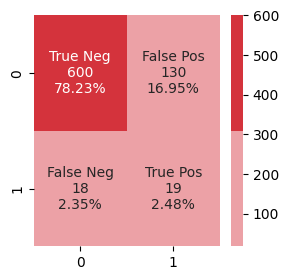

In [ ]:
# read and clean
df = clean(DATAPATH)
# encode categorical
df = encode(df, categorical_cols)
# split 
x_train, x_test, y_train, y_test = tts(df)
# changing sampling techniques
x_train, y_train = under_smote(x_train, y_train)
# feature selection
x_train, x_test = drop_feature(x_train, x_test)
# correlation remover
x_train, x_test = corr_remover(x_train, x_test, sensitive_feature = 'gender')
# scaling
x_train, x_test = scaling(x_train, x_test)
# run the modified ADS 
classifier3 = XGBClassifier(learning_rate= 0.01,max_depth = 3,n_estimators = 1000)
performance3, fairness3, _ = eval(classifier3, x_train, y_train, x_test, y_test, show_roc = False)
df_res = store_res(performance3, 'Correlation Remover ADS', overall_result=df_res)

In [ ]:
df_res

acc    ppv    npv  recall     f1   TN   FP  FN  \
Original ADS             0.839  0.842  0.869   0.839  0.839  298   75  45   
adasyn ADS               0.802  0.925  0.966   0.802  0.853  599  131  21   
smote_tomek ADS          0.819  0.926  0.967   0.819  0.864  612  118  21   
smote_enn ADS            0.751  0.932  0.974   0.751  0.821  554  176  15   
Correlation Remover ADS  0.807  0.930  0.971   0.807  0.857  600  130  18   

                          TP  roc_acc    FPR    TPR    TNR    FNR   FNRP  \
Original ADS             329    0.839  0.201  0.880  0.799  0.120  0.569   
adasyn ADS                16    0.626  0.179  0.432  0.821  0.568  0.808   
smote_tomek ADS           16    0.635  0.162  0.432  0.838  0.568  0.984   
smote_enn ADS             22    0.677  0.241  0.595  0.759  0.405  0.656   
Correlation Remover ADS   19    0.668  0.178  0.514  0.822  0.486  0.835   

                         equalized_odds_ratio  demo_parity_diff  \
Original ADS                            0.493             0.218   
adasyn ADS                              0.643             0.066   
smote_tomek ADS                         0.622             0.068   
smote_enn ADS                           0.762             0.048   
Correlation Remover ADS                 0.697             0.054   

                         demo_parity_ratio  female_acc  female_sr  female_FNR  \
Original ADS                         0.644       0.832      0.613       0.101   
adasyn ADS                           0.701       0.769      0.219       0.619   
smote_tomek ADS                      0.665       0.790      0.204       0.571   
smote_enn ADS                        0.829       0.724      0.278       0.476   
Correlation Remover ADS              0.751       0.781      0.217       0.524   

                         female_FPR  male_acc  male_sr  male_FNR  male_FPR  
Original ADS                  0.253     0.855    0.395     0.177     0.125  
adasyn ADS                    0.211     0.846    0.154     0.500     0.136  
smote_tomek ADS               0.192     0.858    0.135     0.562     0.120  
smote_enn ADS                 0.266     0.788    0.231     0.312     0.207  
Correlation Remover ADS       0.204     0.843    0.163     0.438     0.142

#  Modification 3: Model, Hyper-Parameters, Cross-Validation
- run model across different hyper parameters
- what are the hyper parameters for XGBoost
- which parameters are deemed the most important to vary (for accuracy, fairness and robustness)
- run model across various number of k-folds

In [ ]:
# read and clean
df = clean(DATAPATH)
# encode categorical
df = encode(df, categorical_cols)
# split 
x_train, x_test, y_train, y_test = tts(df)
# changing sampling techniques
x_train, y_train = under_smote(x_train, y_train)
# feature selection
x_train, x_test = drop_feature(x_train, x_test)
# correlation remover
x_train, x_test = corr_remover(x_train, x_test, sensitive_feature = 'gender')
# scaling
x_train, x_test = scaling(x_train, x_test)
# classifier
classifier4 = XGBClassifier(booster = 'gbtree', objective = 'binary:logistic')
parameters = {'learning_rate': [0.001, 0.01, 0.05, 0.1],
              'max_depth': range(2, 10, 1), 
              'n_estimators': range(500, 2000, 500)}
# gridsearch tune
grid_search = GridSearchCV(estimator = classifier4, param_grid = parameters, scoring = 'f1', n_jobs = 10, verbose = 3)
grid_search.fit(x_train, y_train)

['Female' 'Male']
['No' 'Yes']
['Govt_job' 'Never_worked' 'Private' 'Self-employed' 'children']
['Rural' 'Urban']
['Unknown' 'formerly smoked' 'never smoked' 'smokes']
Counter({0: 2120, 1: 2120})
Fitting 5 folds for each of 96 candidates, totalling 480 fits


GridSearchCV(estimator=XGBClassifier(base_score=None, booster='gbtree',
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, m...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=10,
             param_grid={'learning_rate': [0.001, 0.01, 0.05, 0.1],
                         'max_depth': range(2, 10),
                         'n_estimators': range(500, 2000, 500)},
             scoring='f1', verbose=3)

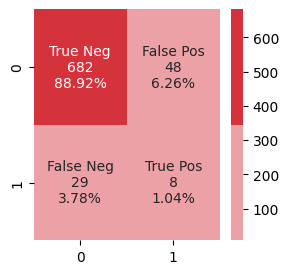

In [ ]:
classifer4 = grid_search.best_estimator_
performance4, fairness4, _ = eval(classifier4, x_train, y_train, x_test, y_test, show_roc = False)
df_res = store_res(performance4, 'GridSearch ADS', overall_result=df_res)

In [ ]:
df_res

acc    ppv    npv  recall     f1   TN   FP  FN  \
Original ADS             0.839  0.842  0.869   0.839  0.839  298   75  45   
adasyn ADS               0.802  0.925  0.966   0.802  0.853  599  131  21   
smote_tomek ADS          0.819  0.926  0.967   0.819  0.864  612  118  21   
smote_enn ADS            0.751  0.932  0.974   0.751  0.821  554  176  15   
Correlation Remover ADS  0.807  0.930  0.971   0.807  0.857  600  130  18   
GridSearch ADS           0.900  0.920  0.959   0.900  0.909  682   48  29   

                          TP  roc_acc    FPR    TPR    TNR    FNR   FNRP  \
Original ADS             329    0.839  0.201  0.880  0.799  0.120  0.569   
adasyn ADS                16    0.626  0.179  0.432  0.821  0.568  0.808   
smote_tomek ADS           16    0.635  0.162  0.432  0.838  0.568  0.984   
smote_enn ADS             22    0.677  0.241  0.595  0.759  0.405  0.656   
Correlation Remover ADS   19    0.668  0.178  0.514  0.822  0.486  0.835   
GridSearch ADS             8    0.575  0.066  0.216  0.934  0.784  0.816   

                         equalized_odds_ratio  demo_parity_diff  \
Original ADS                            0.493             0.218   
adasyn ADS                              0.643             0.066   
smote_tomek ADS                         0.622             0.068   
smote_enn ADS                           0.762             0.048   
Correlation Remover ADS                 0.697             0.054   
GridSearch ADS                          0.438             0.009   

                         demo_parity_ratio  female_acc  female_sr  female_FNR  \
Original ADS                         0.644       0.832      0.613       0.101   
adasyn ADS                           0.701       0.769      0.219       0.619   
smote_tomek ADS                      0.665       0.790      0.204       0.571   
smote_enn ADS                        0.829       0.724      0.278       0.476   
Correlation Remover ADS              0.751       0.781      0.217       0.524   
GridSearch ADS                       0.880       0.903      0.077       0.714   

                         female_FPR  male_acc  male_sr  male_FNR  male_FPR  
Original ADS                  0.253     0.855    0.395     0.177     0.125  
adasyn ADS                    0.211     0.846    0.154     0.500     0.136  
smote_tomek ADS               0.192     0.858    0.135     0.562     0.120  
smote_enn ADS                 0.266     0.788    0.231     0.312     0.207  
Correlation Remover ADS       0.204     0.843    0.163     0.438     0.142  
GridSearch ADS                0.067     0.895    0.068     0.875     0.065

# Modification  4: Post-Processing
- threshold optimizer

['Female' 'Male']
['No' 'Yes']
['Govt_job' 'Never_worked' 'Private' 'Self-employed' 'children']
['Rural' 'Urban']
['Unknown' 'formerly smoked' 'never smoked' 'smokes']
Counter({0: 2120, 1: 2120})


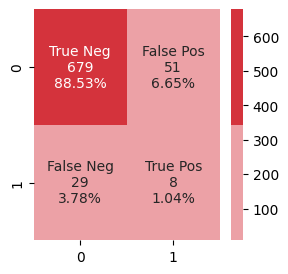

In [ ]:
# read and clean
df = clean(DATAPATH)
# encode categorical
df = encode(df, categorical_cols)
# split 
x_train, x_test, y_train, y_test = tts(df)
# changing sampling techniques
x_train, y_train = under_smote(x_train, y_train)
# feature selection
x_train, x_test = drop_feature(x_train, x_test)
# scaling
x_train, x_test = scaling(x_train, x_test)
# classifier
classifier5 = ThresholdOptimizer(estimator=classifier4, constraints = 'equalized_odds', prefit=True)
performance5, fairness5, _ = eval(classifier5, x_train, y_train, x_test, y_test, show_roc = False, sensitive_feature = 'gender')
df_res = store_res(performance5, 'Threshold Optimizer ADS', overall_result=df_res)

In [ ]:
df_res

acc    ppv    npv  recall     f1   TN   FP  FN  \
Original ADS             0.839  0.842  0.869   0.839  0.839  298   75  45   
adasyn ADS               0.802  0.925  0.966   0.802  0.853  599  131  21   
smote_tomek ADS          0.819  0.926  0.967   0.819  0.864  612  118  21   
smote_enn ADS            0.751  0.932  0.974   0.751  0.821  554  176  15   
Correlation Remover ADS  0.807  0.930  0.971   0.807  0.857  600  130  18   
GridSearch ADS           0.900  0.920  0.959   0.900  0.909  682   48  29   
Threshold Optimizer ADS  0.896  0.919  0.959   0.896  0.907  679   51  29   

                          TP  roc_acc    FPR    TPR    TNR    FNR   FNRP  \
Original ADS             329    0.839  0.201  0.880  0.799  0.120  0.569   
adasyn ADS                16    0.626  0.179  0.432  0.821  0.568  0.808   
smote_tomek ADS           16    0.635  0.162  0.432  0.838  0.568  0.984   
smote_enn ADS             22    0.677  0.241  0.595  0.759  0.405  0.656   
Correlation Remover ADS   19    0.668  0.178  0.514  0.822  0.486  0.835   
GridSearch ADS             8    0.575  0.066  0.216  0.934  0.784  0.816   
Threshold Optimizer ADS    8    0.573  0.070  0.216  0.930  0.784  0.816   

                         equalized_odds_ratio  demo_parity_diff  \
Original ADS                            0.493             0.218   
adasyn ADS                              0.643             0.066   
smote_tomek ADS                         0.622             0.068   
smote_enn ADS                           0.762             0.048   
Correlation Remover ADS                 0.697             0.054   
GridSearch ADS                          0.438             0.009   
Threshold Optimizer ADS                 0.438             0.005   

                         demo_parity_ratio  female_acc  female_sr  female_FNR  \
Original ADS                         0.644       0.832      0.613       0.101   
adasyn ADS                           0.701       0.769      0.219       0.619   
smote_tomek ADS                      0.665       0.790      0.204       0.571   
smote_enn ADS                        0.829       0.724      0.278       0.476   
Correlation Remover ADS              0.751       0.781      0.217       0.524   
GridSearch ADS                       0.880       0.903      0.077       0.714   
Threshold Optimizer ADS              0.933       0.905      0.075       0.714   

                         female_FPR  male_acc  male_sr  male_FNR  male_FPR  
Original ADS                  0.253     0.855    0.395     0.177     0.125  
adasyn ADS                    0.211     0.846    0.154     0.500     0.136  
smote_tomek ADS               0.192     0.858    0.135     0.562     0.120  
smote_enn ADS                 0.266     0.788    0.231     0.312     0.207  
Correlation Remover ADS       0.204     0.843    0.163     0.438     0.142  
GridSearch ADS                0.067     0.895    0.068     0.875     0.065  
Threshold Optimizer ADS       0.064     0.883    0.080     0.875     0.078

# Results and Summary:

In [ ]:
# write out and save the results dataframe
df_res.to_csv('rds_res.csv', index = True)
files.download('rds_res.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
pd.set_option('display.max_columns', None)
df_res = pd.read_csv('rds_res.csv')
cols = list(df_res.columns)
cols[0] = 'models'
df_res.columns = cols
df_res

models    acc    ppv    npv  recall     f1   TN   FP  FN  \
0             Original ADS  0.839  0.842  0.869   0.839  0.839  298   75  45   
1               adasyn ADS  0.802  0.925  0.966   0.802  0.853  599  131  21   
2          smote_tomek ADS  0.819  0.926  0.967   0.819  0.864  612  118  21   
3            smote_enn ADS  0.751  0.932  0.974   0.751  0.821  554  176  15   
4  Correlation Remover ADS  0.807  0.930  0.971   0.807  0.857  600  130  18   
5           GridSearch ADS  0.900  0.920  0.959   0.900  0.909  682   48  29   
6  Threshold Optimizer ADS  0.896  0.919  0.959   0.896  0.907  679   51  29   

    TP  roc_acc    FPR    TPR    TNR    FNR   FNRP  equalized_odds_ratio  \
0  329    0.839  0.201  0.880  0.799  0.120  0.569                 0.493   
1   16    0.626  0.179  0.432  0.821  0.568  0.808                 0.643   
2   16    0.635  0.162  0.432  0.838  0.568  0.984                 0.622   
3   22    0.677  0.241  0.595  0.759  0.405  0.656                 0.762   
4   19    0.668  0.178  0.514  0.822  0.486  0.835                 0.697   
5    8    0.575  0.066  0.216  0.934  0.784  0.816                 0.438   
6    8    0.573  0.070  0.216  0.930  0.784  0.816                 0.438   

   demo_parity_diff  demo_parity_ratio  female_acc  female_sr  female_FNR  \
0             0.218              0.644       0.832      0.613       0.101   
1             0.066              0.701       0.769      0.219       0.619   
2             0.068              0.665       0.790      0.204       0.571   
3             0.048              0.829       0.724      0.278       0.476   
4             0.054              0.751       0.781      0.217       0.524   
5             0.009              0.880       0.903      0.077       0.714   
6             0.005              0.933       0.905      0.075       0.714   

   female_FPR  male_acc  male_sr  male_FNR  male_FPR  
0       0.253     0.855    0.395     0.177     0.125  
1       0.211     0.846    0.154     0.500     0.136  
2       0.192     0.858    0.135     0.562     0.120  
3       0.266     0.788    0.231     0.312     0.207  
4       0.204     0.843    0.163     0.438     0.142  
5       0.067     0.895    0.068     0.875     0.065  
6       0.064     0.883    0.080     0.875     0.078

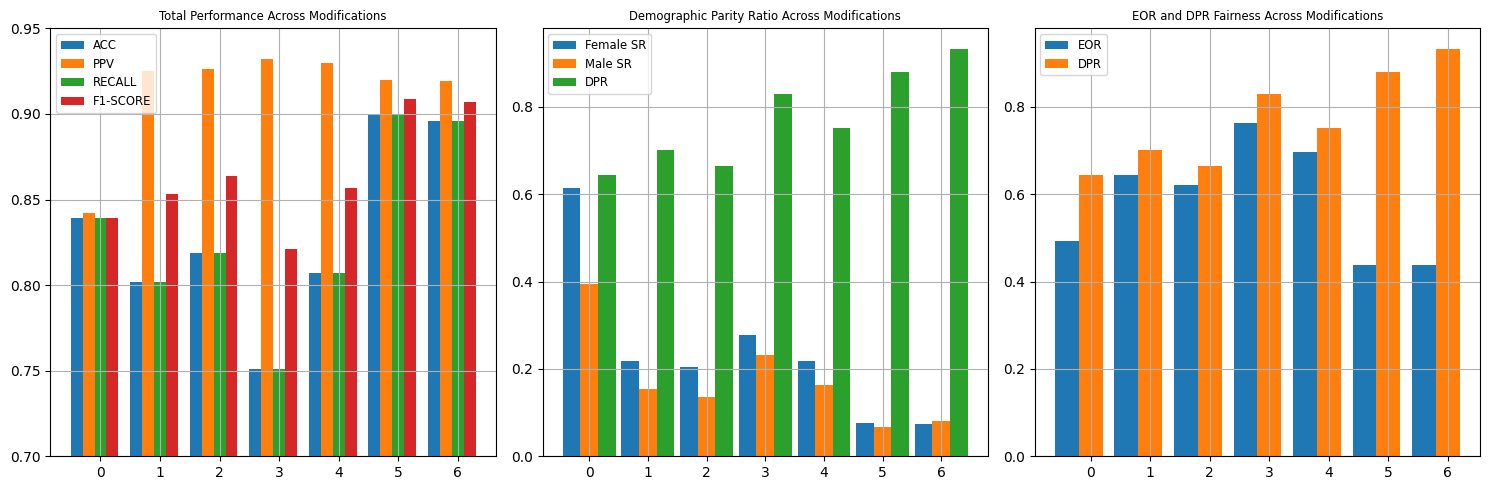

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (15, 5))
X = df_res.models.unique()
X_ticks = np.arange(len(X))

ax[0].bar(X_ticks - .4, df_res.acc, 0.2, label = 'ACC')
ax[0].bar(X_ticks - .2, df_res.ppv, 0.2, label = 'PPV')
ax[0].bar(X_ticks - .0, df_res.recall, 0.2, label = 'RECALL')
ax[0].bar(X_ticks + .2, df_res.f1, 0.2, label = 'F1-SCORE')
ax[0].set_ylim((.7, .95))
ax[0].legend(fontsize ='small')
ax[0].set_title('Total Performance Across Modifications',fontsize='small')
ax[0].grid()

ax[1].bar(X_ticks - .3, df_res.female_sr, 0.3, label = 'Female SR')
ax[1].bar(X_ticks - 0, df_res.male_sr, 0.3, label = 'Male SR')
ax[1].bar(X_ticks + .3, df_res.demo_parity_ratio, 0.3, label = 'DPR')
ax[1].legend(fontsize ='small')
ax[1].set_title('Demographic Parity Ratio Across Modifications', fontsize='small')
ax[1].grid()

ax[2].bar(X_ticks - .4, df_res.equalized_odds_ratio, 0.4, label = 'EOR')
ax[2].bar(X_ticks - 0, df_res.demo_parity_ratio, 0.4, label = 'DPR')
ax[2].legend(fontsize ='small')
ax[2].set_title('EOR and DPR Fairness Across Modifications', fontsize='small')
ax[2].grid()

plt.tight_layout()

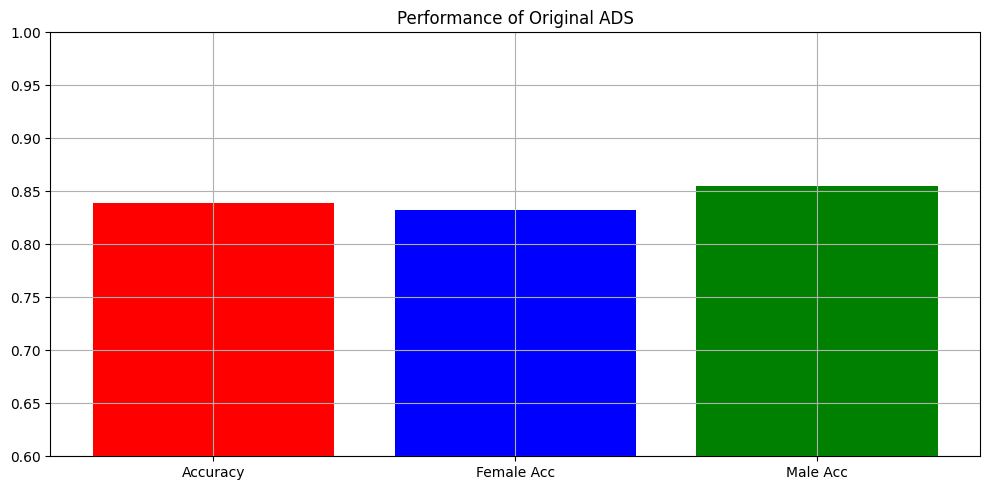

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10, 5))
X = ['Accuracy', 'Female Acc', 'Male Acc']
Y = [df_res.acc[0], df_res.female_acc[0], df_res.male_acc[0]]
X_ticks = np.arange(len(X))

ax.bar(X, Y, color = ['red','blue','green'])
ax.set_title('Performance of Original ADS',fontsize='large')
ax.set_ylim((0.6, 1))
ax.grid()

plt.tight_layout()